In [1]:
#reloads imported library automatically
from IPython.lib.deepreload import reload
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as con
import LittleFunction

# Optics for water

## Absorption and scattering

In [3]:
#data from texts
data = np.genfromtxt('Optics/Fewell_AO348325_Data_File_1.csv', delimiter = ',', skip_header=3).T

data_ab = data[:3] #wavelength (nm)	pure water value 	pure water uncertainty

#https://bg.copernicus.org/articles/4/1041/2007/bg-4-1041-2007.pdf
# doesn't really match what Soud had in his graphs - actually I think it's not bad, just it's missing the lower values
data = np.genfromtxt('Optics/scattering.csv', delimiter = ',')

data_sca = data[:,1:]

In [4]:
'''
data from https://github.com/nEXO-collaboration/nexo-offline/blob/
6807b2f844f6f34215f4b9764626e35140838bfd/Simulation/DetSim/nEXOSim/src/nEXOMaterials.cc#L1101
'''

m = 1
eV= 1

H2OEnergy_od = np.array([2.07*eV, 2.09*eV, 2.12*eV, 2.20*eV, 2.31*eV,
       2.41*eV, 2.48*eV, 2.55*eV, 2.71*eV, 2.83*eV ,
       2.96*eV, 3.05*eV, 3.13*eV, 3.25*eV, 3.32*eV,
       3.45*eV, 3.57*eV, 3.69*eV, 3.85*eV, 3.99*eV,
       4.26*eV, 4.99*eV, 5.29*eV]) #eV

H2ORefractiveIndex_od = np.array([1.332     , 1.33233458, 1.33275974, 1.333     , 1.33337057,
       1.33440426, 1.33497163, 1.33553901, 1.33667376, 1.33746809,
       1.33824548, 1.33866779, 1.33926229, 1.34044132, 1.34115378,
       1.3422317 , 1.34324954, 1.34459331, 1.34635211, 1.34761808,
       1.35056125, 1.36267944, 1.36844391])

H2OImagRefractiveIndex_od = np.array([1.09000000e-08, 8.67541598e-09, 5.81397568e-09, 2.59957621e-09,
       1.58045850e-09, 1.15469946e-09, 1.00331820e-09, 9.51327519e-10,
       9.79448873e-10, 1.12037523e-09, 1.40633887e-09, 1.65035772e-09,
       2.03323649e-09, 2.96013074e-09, 3.67273184e-09, 5.28589740e-09,
       6.86164978e-09, 8.73845457e-09, 1.13689749e-08, 1.36037402e-08,
       1.84743981e-08, 3.43031978e-08, 4.10709380e-08])
    
H2OAbsorption_od = np.array([4.57*m ,    7.41*m,   11.22*m,   19.50*m,
         47.86*m,   92.28*m,  113.50*m,  190.55*m ,
        407.38*m ,  660.69*m,  841.40*m, 1071.52*m,
       1148.15*m ,  870.96*m,  660.69*m,  421.70*m,
        211.35*m,  105.93*m,   44.67*m,   23.99*m,
         18.84*m,   14.79*m,    9.44*m])

In [5]:
h = con.physical_constants['Planck constant in eV/Hz'][0]
c = con.c #m/s

def eVtoWavelength(E): #eV to nm
    return h*c/E * 1e9

In [6]:
data_grab = np.genfromtxt('Optics/GrabedFromGraph_scat.csv', delimiter = ',').T

data_Soud = np.genfromtxt('Optics/SoudWaterProp.csv', delimiter = ',').T

# print(data)

In [7]:
# plt.plot(data[0], data[1])
# plt.semilogy(data_ab[0], data_ab[1], label="Absorption")

# # plt.plot(data_sca[0], data_sca[1], label="scattering")

# plt.xlabel("wavelength [nm]")
# plt.ylabel("pure water coefficent [m$^-1$]")

# plt.xlim(250, 1000)
# plt.legend()
# plt.show()

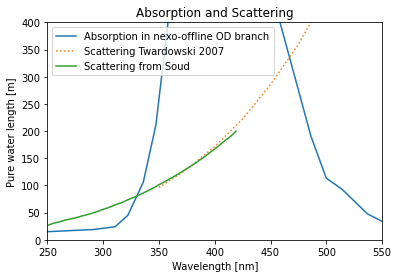

In [75]:
# plt.plot(data_ab[0], 1/data_ab[1], label="Absorption")
plt.plot(eVtoWavelength(H2OEnergy_od), H2OAbsorption_od, label="Absorption in nexo-offline OD branch") #not really sure why these two are offset

plt.plot(data_sca[0], 1/(data_sca[2]*1e-4), label="Scattering Twardowski 2007", ls=":")
# plt.plot(data_sca[0], 1/(data_sca[3]*1e-4), label="scattering2", ls=":")
# plt.plot(data_grab[0], 1/(data_grab[1]*1e-4), label="scattering_graph")

plt.plot(data_Soud[0], data_Soud[1], label="Scattering from Soud")

# plt.plot(scatteringComplied[0], scatteringComplied[1]/1000, label="Scattering complied")

plt.xlabel("Wavelength [nm]")
plt.ylabel("Pure water length [m]")
plt.title("Absorption and Scattering")


plt.xlim(250, 550)
plt.ylim(0, 400)

plt.legend()
plt.show()

In [76]:
#compile the data from Soud and the textbook for scattering, simply taking the textbook values above where Soud's data cuts off
scatteringComplied = [data_Soud[0], data_Soud[1]*1000]

SoudMax = np.max(scatteringComplied[0]) #get cut off

#sort textbook data
inds = data_sca[0].argsort()
wavelength_sca = data_sca[0][inds]
sca_length = 1000/(data_sca[2]*1e-4)[inds]

minI = np.where(wavelength_sca == np.min(wavelength_sca[wavelength_sca > SoudMax]))[0][0]
# print(minI, SoudMax, wavelength_sca)

scatteringComplied = np.concatenate((scatteringComplied, np.array([wavelength_sca[minI:], sca_length[minI:]])), axis=1)

In [77]:
print("Water")
print("Absorption")
LittleFunction.ListForYaml(eVtoWavelength(H2OEnergy_od), H2OAbsorption_od*1000, bounds=[250, 550])
print("Scattering")
# LittleFunction.ListForYaml(data_Soud[0], data_Soud[1]*1000, bounds=[250, 550])
LittleFunction.ListForYaml(scatteringComplied[0], scatteringComplied[1], bounds=[250, 550])


Water
Absorption
0: !!python/tuple [291.04,1.884e+04]
1: !!python/tuple [310.74,2.399e+04]
2: !!python/tuple [322.04,4.467e+04]
3: !!python/tuple [336.0,1.0593e+05]
4: !!python/tuple [347.29,2.1135e+05]
5: !!python/tuple [359.37,4.217e+05]
6: !!python/tuple [373.45,6.6069e+05]
7: !!python/tuple [381.49,8.7096e+05]
8: !!python/tuple [396.12,1.1482e+06]
9: !!python/tuple [406.51,1.0715e+06]
10: !!python/tuple [418.87,8.414e+05]
11: !!python/tuple [438.11,6.6069e+05]
12: !!python/tuple [457.51,4.0738e+05]
13: !!python/tuple [486.21,1.9055e+05]
14: !!python/tuple [499.94,1.135e+05]
15: !!python/tuple [514.46,9.228e+04]
16: !!python/tuple [536.73,4.786e+04]
Scattering
0: !!python/tuple [251.03,2.7216e+04]
1: !!python/tuple [255.64,3.0464e+04]
2: !!python/tuple [261.22,3.3217e+04]
3: !!python/tuple [266.56,3.6467e+04]
4: !!python/tuple [274.57,3.9975e+04]
5: !!python/tuple [281.86,4.4226e+04]
6: !!python/tuple [288.41,4.7728e+04]
7: !!python/tuple [294.48,5.1727e+04]
8: !!python/tuple [299.8

### index of refraction

In [48]:
data = np.genfromtxt('Optics/Huibers1997_Table1.csv', delimiter = ',', skip_header=1).T

data_i1a = data[:2,:-8]
data_i1b = data[2:]

In [49]:
# print(eVtoWavelength(H2OEnergy))

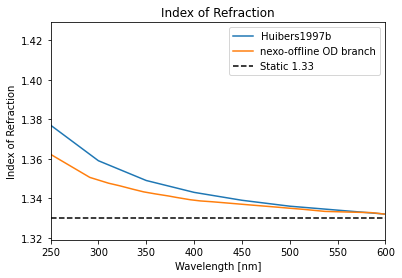

In [50]:
# plt.plot(data_i1a[0], data_i1a[1], label="Huibers1997a")
plt.plot(data_i1b[0], data_i1b[1], label="Huibers1997b")

plt.plot(eVtoWavelength(H2OEnergy_od), H2ORefractiveIndex_od, label="nexo-offline OD branch")

plt.axhline(y=1.33, color="black", ls="--", label="Static 1.33")

plt.xlabel("Wavelength [nm]")
plt.ylabel("Index of Refraction")
plt.title("Index of Refraction")

plt.xlim(250, 600)
plt.legend()
plt.show()

In [51]:
# plt.plot(data_ab[0], data_ab[0]*0, label="Absorption", marker="o")
# plt.plot(eVtoWavelength(H2OEnergy_od), eVtoWavelength(H2OEnergy_od)*0+.2, label="nEXO-offline_od", marker="o")

# plt.xlim(250, 550)
# plt.legend()
# plt.show()

In [78]:
print("Index of Refraction")
LittleFunction.ListForYaml(eVtoWavelength(H2OEnergy_od), H2ORefractiveIndex_od, bounds=[250, 550])

Index of Refraction
0: !!python/tuple [291.04,1.3506]
1: !!python/tuple [310.74,1.3476]
2: !!python/tuple [322.04,1.3464]
3: !!python/tuple [336.0,1.3446]
4: !!python/tuple [347.29,1.3432]
5: !!python/tuple [359.37,1.3422]
6: !!python/tuple [373.45,1.3412]
7: !!python/tuple [381.49,1.3404]
8: !!python/tuple [396.12,1.3393]
9: !!python/tuple [406.51,1.3387]
10: !!python/tuple [418.87,1.3382]
11: !!python/tuple [438.11,1.3375]
12: !!python/tuple [457.51,1.3367]
13: !!python/tuple [486.21,1.3355]
14: !!python/tuple [499.94,1.335]
15: !!python/tuple [514.46,1.3344]
16: !!python/tuple [536.73,1.3334]


# Optics for PMTs

In [79]:
"""
Define borosilicate optical properties
Pyrex, according to DB XML files  //Taken from Daya Bay DDDB/materials/pyrex.xml
"""
mm = 1

pyrexEnergies = np.array([1.55*eV, 1.61*eV, 2.07*eV, 2.48*eV, 15.5*eV])
pyrexRindex = np.array([1.458, 1.458, 1.458, 1.458, 1.458])
pyrexAbsorption = np.array([0.1E-3*mm, 0.5E3*mm, 1.0E3*mm, 2.0E3*mm, 1.0E3*mm]);

#from Hamamatsu
pyrexTransmittance = np.genfromtxt('Optics/TransmittanceDAYA_BAY.csv', delimiter = ',', skip_header=1).T

"""
Define Bialkali optical properties for PMT photocathode - Data from Daya Bay collaboration sims
"""
BialkaliEnergy = np.array([1.55*eV, 15.5*eV ])
BialkaliRefractiveIndex = np.array([2.9,  2.9])
BialkaliImaginaryindex = np.array([1.6, 1.6])

BialkaliAbsorption = np.array([2.036E-7, 2.036E-8])*1000 #mm
#   //AbsLen[1] = 2.036E-7*m; //Calculated from Imaginary index ABSLENGTH = c/ω · κ

In [80]:
# https://github.com/nEXO-collaboration/nexo-offline/blob/6807b2f844f6f34215f4b9764626e35140838bfd/Simulation/DetSim/nEXOSim/src/nEXOMaterials.cc#L1088
# ab = wl * k_im

print(eVtoWavelength(BialkaliEnergy)*BialkaliImaginaryindex * 1e-9)
#doesn't match the values in nexo-offline

[1.27983689e-06 1.27983689e-07]


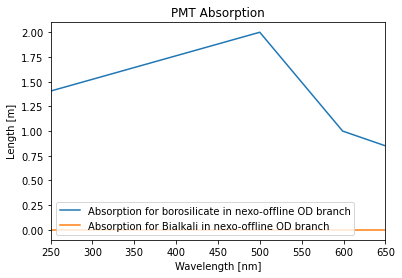

In [81]:
plt.plot(eVtoWavelength(pyrexEnergies), pyrexAbsorption/1000, label="Absorption for borosilicate in nexo-offline OD branch")

plt.plot(eVtoWavelength(BialkaliEnergy), BialkaliAbsorption/1000, label="Absorption for Bialkali in nexo-offline OD branch")

plt.xlabel("Wavelength [nm]")
plt.ylabel("Length [m]")
plt.title("PMT Absorption")

plt.xlim(250, 650)
# plt.ylim(0, 400)

plt.legend()
plt.show()

In [82]:
#really just constant
# plt.plot(eVtoWavelength(pyrexEnergies), pyrexRindex, label="borosilicate nexo-offline OD branch")
# # plt.plot(eVtoWavelength(BialkaliEnergy), BialkaliRefractiveIndex, label="Bialkali nexo-offline OD branch")

# plt.xlabel("Wavelength [nm]")
# plt.ylabel("Index of Refraction")
# plt.title("PMT Index of Refraction")

# # plt.xlim(250, 600)
# plt.legend()
# plt.show()

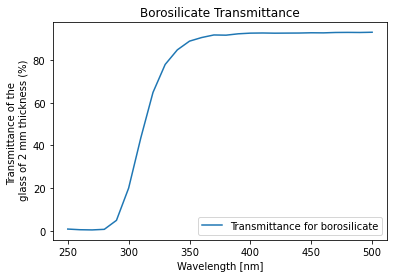

In [83]:

plt.plot(pyrexTransmittance[0], pyrexTransmittance[1], label="Transmittance for borosilicate")

plt.xlabel("Wavelength [nm]")
plt.ylabel("Transmittance of the \n glass of 2 mm thickness (%)")
plt.title("Borosilicate Transmittance")

# plt.xlim(250, 550)
# plt.ylim(0, 400)

plt.legend()
plt.show()

In [84]:
print("Borosilicate")
print("Absorption")
LittleFunction.ListForYaml(eVtoWavelength(pyrexEnergies), pyrexAbsorption, bounds=[250, 700])
print("Transmittance")
LittleFunction.ListForYaml(pyrexTransmittance[0], pyrexTransmittance[1]/100, bounds=[250, 550])

Borosilicate
Absorption
0: !!python/tuple [499.94,2000.0]
1: !!python/tuple [598.96,1000.0]
Transmittance
0: !!python/tuple [260.0,0.0062]
1: !!python/tuple [270.0,0.0053]
2: !!python/tuple [280.0,0.008]
3: !!python/tuple [290.0,0.05]
4: !!python/tuple [300.0,0.2008]
5: !!python/tuple [310.0,0.4356]
6: !!python/tuple [320.0,0.6478]
7: !!python/tuple [330.0,0.7785]
8: !!python/tuple [340.0,0.8468]
9: !!python/tuple [350.0,0.8875]
10: !!python/tuple [360.0,0.9044]
11: !!python/tuple [370.0,0.9164]
12: !!python/tuple [380.0,0.9154]
13: !!python/tuple [390.0,0.9218]
14: !!python/tuple [400.0,0.9249]
15: !!python/tuple [410.0,0.9256]
16: !!python/tuple [420.0,0.9247]
17: !!python/tuple [430.0,0.9251]
18: !!python/tuple [440.0,0.9254]
19: !!python/tuple [450.0,0.9266]
20: !!python/tuple [460.0,0.9262]
21: !!python/tuple [470.0,0.928]
22: !!python/tuple [480.0,0.9284]
23: !!python/tuple [490.0,0.928]
24: !!python/tuple [500.0,0.9291]


In [87]:
print("Bialkali")
print("Absorption")
LittleFunction.ListForYaml(eVtoWavelength(BialkaliEnergy), BialkaliAbsorption)#, bounds=[250, 700])
print("Index")
LittleFunction.ListForYaml(eVtoWavelength(BialkaliEnergy), BialkaliRefractiveIndex)#, bounds=[250, 550])

Bialkali
Absorption
0: !!python/tuple [79.99,2.036e-05]
1: !!python/tuple [799.9,0.0002036]
Index
0: !!python/tuple [79.99,2.9]
1: !!python/tuple [799.9,2.9]


In [86]:
X = np.array([5,4,3,2,1,4,6,7,99])
Y = np.array(['a','b', 'c', 'd', 'e'])

In [46]:
X[0:7]

array([5, 4, 3, 2, 1, 4, 6])